In [7]:
import pandas as pd
import numpy as np
import yfinance as yf

tickers = ["MSFT", "AAPL", "GOOG", "AMZN"]
start_date = "2015-07-01"
end_date = "2025-07-31"

portfolio_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
portfolio_data.ffill(inplace=True)
portfolio_data.dropna(inplace=True)

daily_returns = portfolio_data.pct_change().dropna()
covariance_matrix = daily_returns.cov() * 252

mean_daily_returns = daily_returns.mean()
annual_mean_returns = mean_daily_returns * 252

expected_returns_vector = annual_mean_returns.to_numpy()

print("Annualized Expected Returns:\n", annual_mean_returns)
print("\nAnnualized Covariance Matrix:\n", covariance_matrix)

[*********************100%***********************]  4 of 4 completed

Annualized Expected Returns:
 Ticker
AAPL    0.241710
AMZN    0.288029
GOOG    0.244320
MSFT    0.294293
dtype: float64

Annualized Covariance Matrix:
 Ticker      AAPL      AMZN      GOOG      MSFT
Ticker                                        
AAPL    0.086029  0.055693  0.051696  0.054650
AMZN    0.055693  0.107997  0.062455  0.060160
GOOG    0.051696  0.062455  0.085004  0.056445
MSFT    0.054650  0.060160  0.056445  0.073503


Maximum Sharpe Ratio Portfolio Weights:
 MSFT    0.074203
AAPL    0.188742
GOOG    0.001992
AMZN    0.735063
dtype: float64

Minimum Volatility Portfolio Weights:
 MSFT    0.284881
AAPL    0.066658
GOOG    0.253522
AMZN    0.394940
dtype: float64


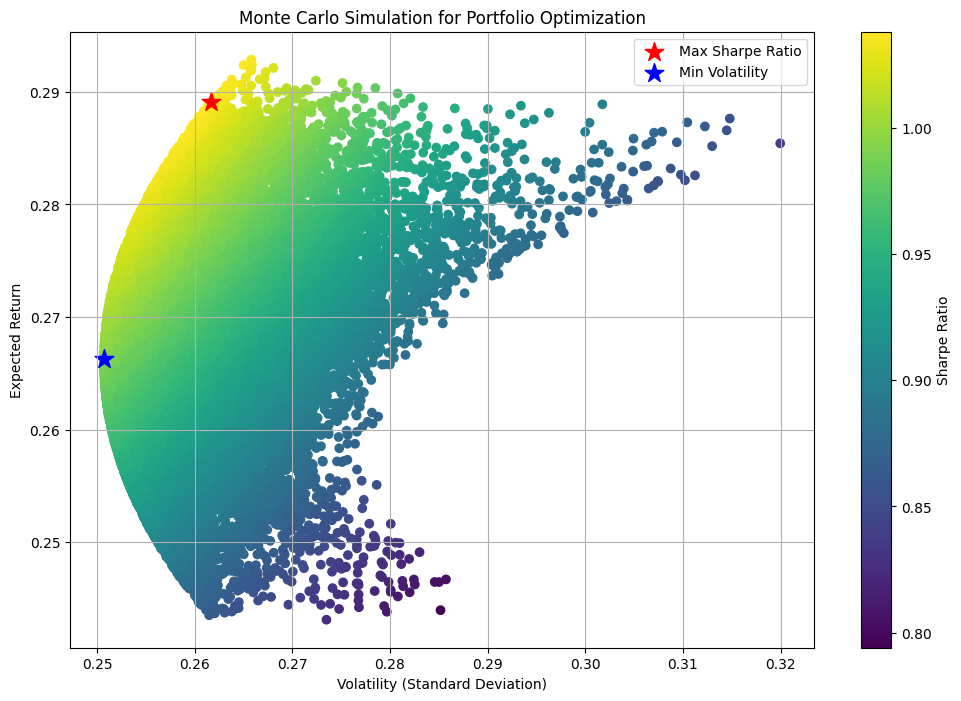

In [ ]:
import matplotlib.pyplot as plt

num_portfolios = 50000
risk_free_rate = 0.0175

all_weights = np.zeros((num_portfolios, len(tickers)))
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatility = np.zeros(num_portfolios)
sharpe_ratio = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    all_weights[i, :] = weights

    ret = np.sum(annual_mean_returns * weights)
    portfolio_returns[i] = ret

    vol = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values, weights)))
    portfolio_volatility[i] = vol

    sharpe_ratio[i] = (ret - risk_free_rate) / vol

max_sharpe_idx = sharpe_ratio.argmax()
max_sharpe_portfolio = all_weights[max_sharpe_idx, :]

min_vol_idx = portfolio_volatility.argmin()
min_vol_portfolio = all_weights[min_vol_idx, :]

print("Maximum Sharpe Ratio Portfolio Weights:\n", pd.Series(max_sharpe_portfolio, index=tickers))
print("\nMinimum Volatility Portfolio Weights:\n", pd.Series(min_vol_portfolio, index=tickers))

plt.figure(figsize=(12, 8))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Monte Carlo Simulation for Portfolio Optimization')
plt.scatter(portfolio_volatility[max_sharpe_idx], portfolio_returns[max_sharpe_idx], c='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(portfolio_volatility[min_vol_idx], portfolio_returns[min_vol_idx], c='blue', marker='*', s=200, label='Min Volatility')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  4 of 4 completed
C:\Users\josib\AppData\Local\Temp\ipykernel_2632\1680274738.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_benchmark = yf.download('^GSPC', start=backtest_start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


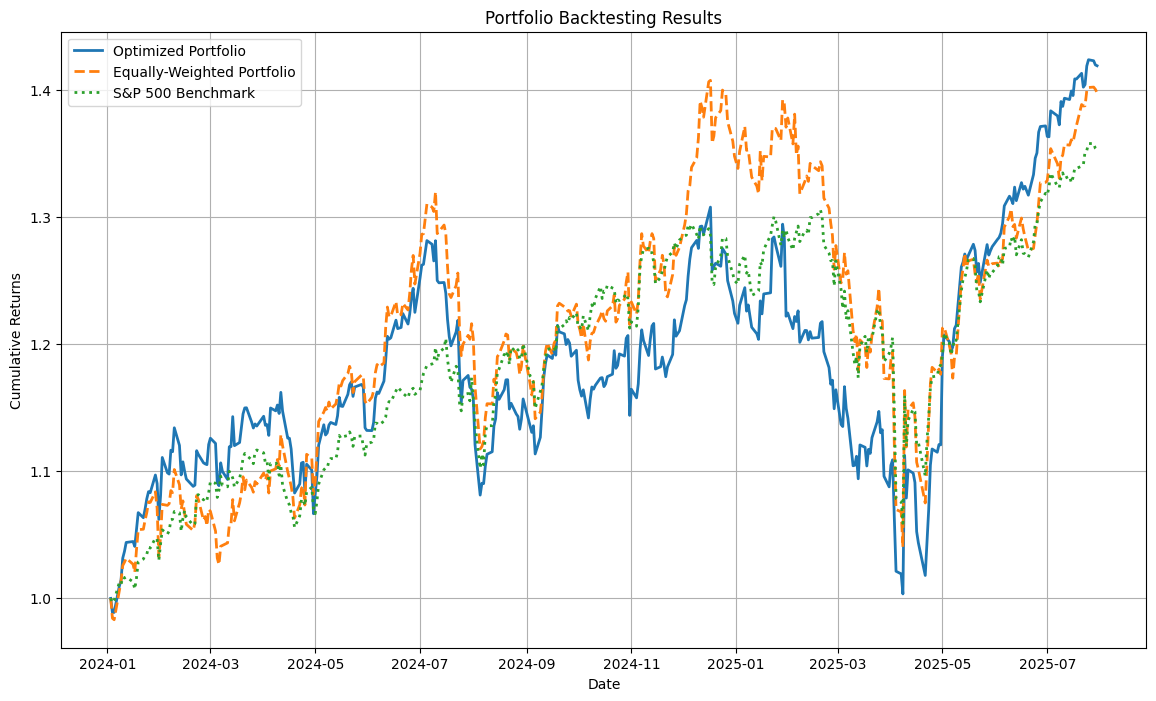

Final Cumulative Returns:
Optimized Portfolio: 1.42
Equally-Weighted Portfolio: 1.40
S&P 500 Benchmark: 1.35


In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers and download the data (same as Step 1)
tickers = ["MSFT", "AAPL", "GOOG", "AMZN"]
start_date = "2015-07-01"
end_date = "2025-07-31"
portfolio_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
portfolio_data.ffill(inplace=True)
portfolio_data.dropna(inplace=True)

# Define the optimal weights from the Max Sharpe Ratio Portfolio
# (Replace with the weights you found in the previous step)
max_sharpe_portfolio_weights = np.array([0.074203, 0.188742, 0.001992, 0.735063])
# Create an equally-weighted portfolio for comparison
equal_weights = np.array([0.25, 0.25, 0.25, 0.25])

# Define the backtesting period
backtest_start_date = '2024-01-01'
backtest_data = portfolio_data.loc[backtest_start_date:]

# Calculate the daily returns for the backtesting period
backtest_returns = backtest_data.pct_change().dropna()

# Calculate the performance of the optimized portfolio
optimized_portfolio_returns = (backtest_returns * max_sharpe_portfolio_weights).sum(axis=1)
optimized_portfolio_cumulative_returns = (1 + optimized_portfolio_returns).cumprod()

# Calculate the performance of the equally-weighted benchmark portfolio
equal_portfolio_returns = (backtest_returns * equal_weights).sum(axis=1)
equal_portfolio_cumulative_returns = (1 + equal_portfolio_returns).cumprod()

# Download the S&P 500 as an external benchmark
sp500_benchmark = yf.download('^GSPC', start=backtest_start_date, end=end_date)['Close']
sp500_returns = sp500_benchmark.pct_change().dropna()
sp500_cumulative_returns = (1 + sp500_returns).cumprod()

# Align all cumulative returns to start at 1
optimized_portfolio_cumulative_returns = optimized_portfolio_cumulative_returns / optimized_portfolio_cumulative_returns.iloc[0]
equal_portfolio_cumulative_returns = equal_portfolio_cumulative_returns / equal_portfolio_cumulative_returns.iloc[0]
sp500_cumulative_returns = sp500_cumulative_returns / sp500_cumulative_returns.iloc[0]

# Plot the backtesting results
plt.figure(figsize=(14, 8))
plt.plot(optimized_portfolio_cumulative_returns, label='Optimized Portfolio', linewidth=2)
plt.plot(equal_portfolio_cumulative_returns, label='Equally-Weighted Portfolio', linestyle='--', linewidth=2)
plt.plot(sp500_cumulative_returns, label='S&P 500 Benchmark', linestyle=':', linewidth=2)
plt.title('Portfolio Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Final Performance Summary
print("Final Cumulative Returns:")
print(f"Optimized Portfolio: {optimized_portfolio_cumulative_returns.iloc[-1]:.2f}")
print(f"Equally-Weighted Portfolio: {equal_portfolio_cumulative_returns.iloc[-1]:.2f}")
print(f"S&P 500 Benchmark: {sp500_cumulative_returns.iloc[-1].item():.2f}")